# Weekend Movie Trip

Data from https://grouplens.org/datasets/movielens/ 

Using the MovieLens 20M Dataset data set

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
import numpy as np

### Load data

In [194]:
movies = pd.read_csv('../data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [195]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [196]:
ratings = pd.read_csv('../data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [197]:
len(ratings)

100836

In [198]:
tags = pd.read_csv("../data/tags.csv")       
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [199]:
len(tags["tag"].unique())

1589

### Merge movies and ratings

In [200]:
movieratings = pd.merge(movies, ratings, on=['movieId'])
movieratings.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Get average ratings of each movie

In [201]:
avg_ratings = movieratings.groupby('movieId')['rating'].mean().reset_index(name ='average rating')
avg_ratings.head(5)

,movieId,average rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


Merge movies to average ratings

In [202]:
movieratings = pd.merge(movieratings, avg_ratings,on=['movieId'])
movieratings.head(5)

,movieId,title,genres,userId,rating,timestamp,average rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,3.92093


Drop the unused columns

In [203]:
movieratings.drop(["userId","timestamp","rating","genres"],axis=1,inplace=True)
movieratings.head(5)

,movieId,title,average rating
0,1,Toy Story (1995),3.92093
1,1,Toy Story (1995),3.92093
2,1,Toy Story (1995),3.92093
3,1,Toy Story (1995),3.92093
4,1,Toy Story (1995),3.92093


Remove duplicates lines

In [204]:
movieratings = movieratings.drop_duplicates()
movieratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 0 to 100835
Data columns (total 3 columns):
movieId           9724 non-null int64
title             9724 non-null object
average rating    9724 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 303.9+ KB


#### Best movies with high average ratings

In [205]:
movieratings.sort_values(by=['average rating'],ascending=False, inplace=True)
movieratings.head(10)

,movieId,title,average rating
93261,88448,Paper Birds (Pájaros de papel) (2010),5.0
95421,100556,"Act of Killing, The (2012)",5.0
99429,143031,Jump In! (2007),5.0
99462,143511,Human (2015),5.0
99464,143559,L.A. Slasher (2015),5.0
70038,6201,Lady Jane (1986),5.0
95588,102217,Bill Hicks: Revelations (1993),5.0
95536,102084,Justice League: Doom (2012),5.0
70026,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
99503,145994,Formula of Love (1984),5.0


### Deal with genres

In [206]:
genres = movies['genres'].str.split('|').apply(pd.Series, 1).stack()

In [207]:
genres.head()

0  0    Adventure
   1    Animation
   2     Children
   3       Comedy
   4      Fantasy
dtype: object

In [208]:
genres.name = 'genres'
genres.index = genres.index.droplevel(-1)

In [209]:
movies.drop(["genres"],axis=1,inplace = True)
moviegenres = movies.join(genres)

In [210]:
moviegenres = movies.join(genres)

In [211]:
moviegenres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


#### Number of movies in each genre

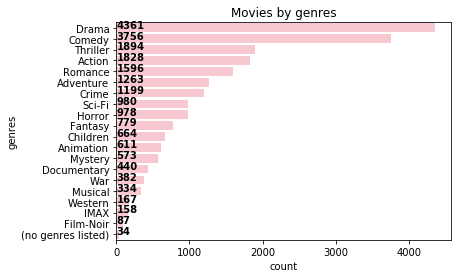

In [212]:
plt.figure()
ax = sns.countplot(y = moviegenres["genres"],color = "pink",
                   order=moviegenres["genres"].value_counts().index
                 )
for i,j in enumerate(moviegenres["genres"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Movies by genres")
plt.show()

Not surprisingly, Drama ranks the first and Comedy ranks the second.

### Deal with tags

In [213]:
tags.drop(["userId","timestamp"],axis=1,inplace=True)
tags.head(3)

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell


### Combine ratings and genres

In [214]:
moviegenres.drop(["title"],axis=1,inplace = True)

In [215]:
moviegenres.head()

,movieId,genres
0,1,Adventure
0,1,Animation
0,1,Children
0,1,Comedy
0,1,Fantasy


In [216]:
moviegenratings = pd.merge(moviegenres, movieratings, on=['movieId'])

In [217]:
moviegenratings.head()

,movieId,genres,title,average rating
0,1,Adventure,Toy Story (1995),3.92093
1,1,Animation,Toy Story (1995),3.92093
2,1,Children,Toy Story (1995),3.92093
3,1,Comedy,Toy Story (1995),3.92093
4,1,Fantasy,Toy Story (1995),3.92093


In [218]:
moviegenratings_ave=moviegenratings.groupby("genres")["average rating"].mean()

In [219]:
moviegenratings_ave = moviegenratings_ave.sort_values(ascending=False)

Text(0,0.5,'Average Ratings')

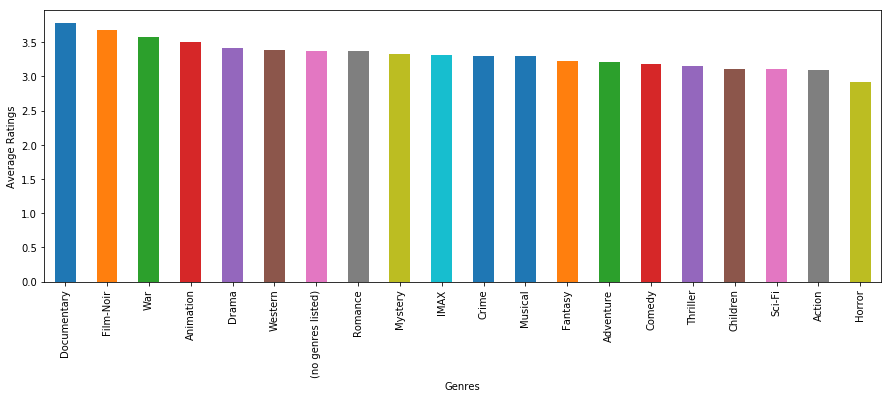

In [220]:
moviegenratings_ave.plot.bar(figsize=(15, 5))

plt.xlabel("Genres")
plt.ylabel("Average Ratings")

#### Genres with Fewer and Better movies
From the plot we can see that, Documentary movies get the highest ratings and the Film-Noir is the second. While these two categories are ranking low in the number count of the movies. 
The horror movies rank the lowest.

### Get a full table 
Combine tags

In [221]:
movie_total = pd.merge(moviegenratings, tags, on=['movieId'])
movie_total = movie_total.drop_duplicates()

In [222]:
movie_total.head()

,movieId,genres,title,average rating,tag
0,1,Adventure,Toy Story (1995),3.92093,pixar
2,1,Adventure,Toy Story (1995),3.92093,fun
3,1,Animation,Toy Story (1995),3.92093,pixar
5,1,Animation,Toy Story (1995),3.92093,fun
6,1,Children,Toy Story (1995),3.92093,pixar


In [223]:
movie_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9556 entries, 0 to 9894
Data columns (total 5 columns):
movieId           9556 non-null int64
genres            9556 non-null object
title             9556 non-null object
average rating    9556 non-null float64
tag               9556 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 447.9+ KB


#### Encoding the table

In [224]:
movie_total.drop(["title"],axis=1,inplace = True)

In [225]:
movie_total["tag"] = movie_total["tag"].astype('category')
movie_total["genres"] = movie_total["genres"].astype('category')

In [226]:
movie_total["tag"] = movie_total["tag"].cat.codes
movie_total["genres"] = movie_total["genres"].cat.codes

In [227]:
movie_total.head()

,movieId,genres,average rating,tag
0,1,2,3.92093,1239
2,1,2,3.92093,930
3,1,3,3.92093,1239
5,1,3,3.92093,930
6,1,4,3.92093,1239


### Heatmap of correlation

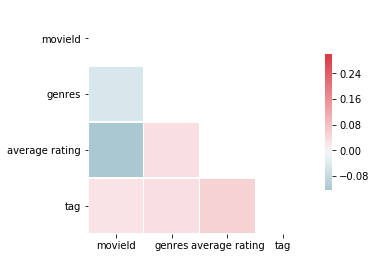

In [228]:
# Compute the correlation matrix
corr = movie_total.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The genres and tag both has influence on ratings.

## Clustering

In [229]:
from sklearn.cluster import KMeans

In [230]:
features = movie_total[['tag','average rating']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)

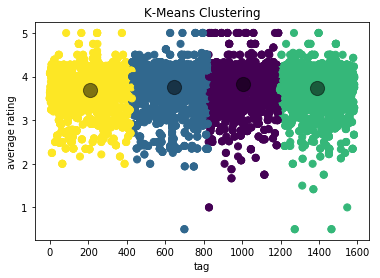

In [231]:
plt.scatter(features['tag'], features['average rating'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title("K-Means Clustering")
plt.xlabel("tag")
plt.ylabel("average rating")
plt.show()

In [232]:
features = movie_total[['genres','average rating']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)

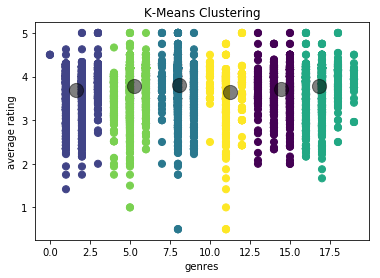

In [233]:
plt.scatter(features['genres'], features['average rating'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title("K-Means Clustering")
plt.xlabel("genres")
plt.ylabel("average rating")
plt.show()

In [234]:
features = movie_total[['genres','tag']]
kmeans = KMeans(n_clusters=15)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)

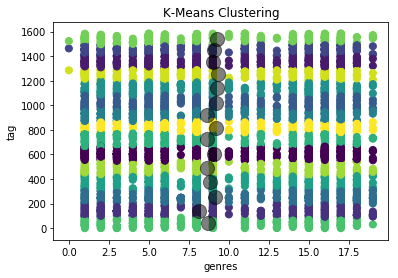

In [235]:
plt.scatter(features['genres'], features['tag'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title("K-Means Clustering")
plt.xlabel("genres")
plt.ylabel("tag")
plt.show()

#### I tried out different number of clusters for these clustering, and all result look like chaos.

My strategy of recommending a movie:
1. The movies in same genres .
2. The movies with same tags (if existed).
3. Rank the list by average rating.